# Load Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# we need to install emoji
!pip install emoji --upgrade
!pip install wordcloud
import emoji
from wordcloud import WordCloud
!pip install contractions
import contractions

!pip install nltk

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# imp/ort these modules
from nltk.stem import WordNetLemmatizer
import string # retrieve english punctuation signs by using this package

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 34.3 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=8c0e59c2cc5a1eb50bff9bbcd88486d461ab0c4ee55ef644028727129d521313
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 38.5 MB/s 
     |████████████████████████████████| 106 kB 80.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Load Dataframe :               

In [ ]:
#cols = ['rank','tweet_id','date','query','user','tweet_']
#df = pd.read_csv('/content/drive/MyDrive/P_7/train.csv',sep=',' ,names=cols,  encoding='latin-1',header=None)

In [ ]:
############################################
#df1 = df.loc[df['rank']==0].sample(n=8000)
#df2 = df.loc[df['rank']==4].sample(n=8000)
#df2.loc[df2['rank']==4,'rank']=1
###########################################

#trames = [df1,df2]
#df = pd.concat(trames)
#df.drop(['tweet_id','date','query','user'],axis=1,inplace=True)
###########################################

In [ ]:
# Save file in drive to be used later with other models
#df.to_csv('/content/drive/MyDrive/P_7/df_original.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/P_7/df_original.csv')

In [ ]:
df.head(2)

,rank,tweet_
0,0,@Superpaperlink @treesmurf11 Oh that's just an...
1,0,I miss you guys soo much


In [ ]:
# Define stemmer 
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [ ]:
corpus_stem=[]

for i in range(0,16000):
     #clean Usertags '@user'
    review = re.sub('\B@\w+',"",df['tweet_'].iloc[i]) # \B to specify non-word boundary
    review = re.sub('(http|https):\/\/\S+','',review)#twisk slashes is mandatory ,\S captures any following characters exept white space
    review = re.sub('RT\s+',"",review) # \s : token character for white space / '+' is added to specify one to match one or more of the preceeding tokens
    #clean emoji
    review = emoji.demojize(review) # replace emoji by it's name
    review = re.sub('[^a-zA-Z]',' ',review)

    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus_stem.append(review)

In [ ]:
# Define Lemmatizer   
lemmatizer = WordNetLemmatizer()

In [ ]:
corpus_lemm=[]

for i in range(0,16000):
    #clean Usertags '@user'
    review = re.sub('\B@\w+',"",df['tweet_'].iloc[i]) # \B to specify non-word boundary
    review = re.sub('(http|https):\/\/\S+','',review)#twisk slashes is mandatory ,\S captures any following characters exept white space
    review = re.sub('RT\s+',"",review) # \s : token character for white space / '+' is added to specify one to match one or more of the preceeding tokens
    #clean emoji
    review = emoji.demojize(review) # replace emoji by it's name
    review = re.sub('[^a-zA-Z]',' ',review)
      
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus_lemm.append(review)

In [ ]:
df['tw_stem'] = corpus_stem
df['tw_lemm'] = corpus_lemm

In [ ]:
df.head(10)

,rank,tweet_,tw_stem,tw_lemm
0,0,@Superpaperlink @treesmurf11 Oh that's just an...,oh annoy guess use dsi specif stuff like app shop,oh annoying guess used dsi specific stuff like...
1,0,I miss you guys soo much,miss guy soo much,miss guy soo much
2,0,@emilyphillips i use to leave them in my trunk...,use leav trunk time,use leave trunk time
3,0,"Fuck, an old man just coughed in my hair!",fuck old man cough hair,fuck old man coughed hair
4,0,@bethoneil that sucks you should close the of...,suck close offic earli,suck close office early
5,0,Dealing with Vodafone is a nightmare,deal vodafon nightmar,dealing vodafone nightmare
6,0,It's hard to cry when the tears won't fall down,hard cri tear fall,hard cry tear fall
7,0,@honeybfly215 your missing all the festivities...,miss festiv sad not,missing festivity sad not
8,0,Weekends over - Back To Schoooolio for Anoth...,weekend back schoooolio anoth week,weekend back schoooolio another week
9,0,is still not happy! after tryna gain an early ...,still not happi tryna gain earli niht sleep st...,still not happy tryna gain early nihts sleep s...


In [ ]:
# Save cleaned file in drive to be used later with other models
df.to_csv('/content/drive/MyDrive/P_7/df_cleaned.csv', index=False)

## Remove null tweets from dataset

In [ ]:
print('Count of null tweets   :',df.loc[df['tw_lemm']==''].shape[0])

Count of null tweets   : 64


In [ ]:
#################### Discard null tweet rows from dataset
df = df.loc[df['tw_lemm']!='']
####################
print('Count of null tweets   :',df.loc[df['tw_lemm']==''].shape[0])

Count of null tweets   : 0


## Splitting text into train & test sets

In [ ]:
from sklearn.model_selection import train_test_split
reviews = df['tw_lemm'].values
labels = df['rank'].values
reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=1000)

## Transforming Text into Numerical Feature Vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#By default, the vectorizer might be created as follows:
vectorizer = CountVectorizer()
#vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
vectorizer.fit(reviews_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(reviews_train)
X_test = vectorizer.transform(reviews_test)

X = vectorizer.transform(reviews)
y = labels

## Training the Model method : 
#### 1 - Logistic regression
#### 2 - SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

lr = LogisticRegression()
sv = SVC()

## Evaluation of the Model :

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#################################################
####### Logistic Regression #####################
#################################################
accuracy score _ on train   : 0.9002980859742705


accuracy score _ on test   : 0.7349435382685069


Classification on train   :               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6412
           1       0.90      0.90      0.90      6336

    accuracy                           0.90     12748
   macro avg       0.90      0.90      0.90     12748
weighted avg       0.90      0.90      0.90     12748



Classification on test   :               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1553
           1       0.74      0.75      0.74      1635

    accuracy                           0.73      3188
   macro avg       0.73      0.73      0.73      3188
weighted avg       0.73      0.73      0.73      3188



confusion matrix   :
###############

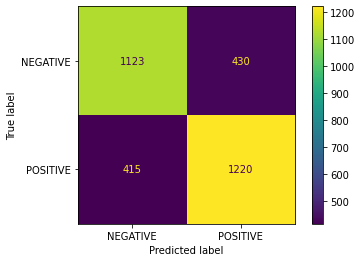

In [ ]:
print('#################################################')
print('####### Logistic Regression #####################')
print('#################################################')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('accuracy score _ on train   :', accuracy_score(y_pred_train, y_train))
print('\n')
print('accuracy score _ on test   :', accuracy_score(y_pred, y_test))
print('\n')
print('Classification on train   :', classification_report(y_train, y_pred_train, labels=[0, 1]))
print('\n')
print('Classification on test   :', classification_report(y_test, y_pred, labels=[0, 1]))
print('\n')

cm = confusion_matrix(y_test,y_pred)
#print('Accuracy of model :',model,'=',y)
print('confusion matrix   :')
   
cmd = ConfusionMatrixDisplay(cm, display_labels=['NEGATIVE','POSITIVE'])
cmd.plot()
print('########################################################')

### HyperparameterTuning :



In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
# X, y as Data input
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.735337 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.686746 (0.009228) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.691097 (0.009337) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.686725 (0.009326) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.712662 (0.007957) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.712704 (0.008299) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.712641 (0.007969) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.734082 (0.007444) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.734124 (0.007402) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.734061 (0.007463) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.735337 (0.008905) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.735337 (0.008905) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.735295 (0.009050) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.716114 (0.009107) wit

#################################################
#### Logistic Regression with new parameters   ##
#################################################
accuracy score _ on train   : 0.8079698776278632


accuracy score _ on test   : 0.7415307402760352


Classification on train   :               precision    recall  f1-score   support

           0       0.82      0.79      0.81      6412
           1       0.80      0.82      0.81      6336

    accuracy                           0.81     12748
   macro avg       0.81      0.81      0.81     12748
weighted avg       0.81      0.81      0.81     12748



Classification on test   :               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1553
           1       0.74      0.76      0.75      1635

    accuracy                           0.74      3188
   macro avg       0.74      0.74      0.74      3188
weighted avg       0.74      0.74      0.74      3188



confusion matrix   :
###############

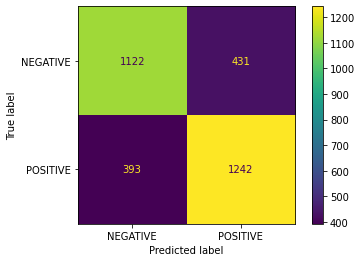

In [ ]:
print('#################################################')
print('#### Logistic Regression with new parameters   ##')
print('#################################################')
lr_tuned = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg')
lr_tuned.fit(X_train, y_train)
y_pred = lr_tuned.predict(X_test)
y_pred_train = lr_tuned.predict(X_train)

print('accuracy score _ on train   :', accuracy_score(y_pred_train, y_train))
print('\n')
print('accuracy score _ on test   :', accuracy_score(y_pred, y_test))
print('\n')
print('Classification on train   :', classification_report(y_train, y_pred_train, labels=[0, 1]))
print('\n')
print('Classification on test   :', classification_report(y_test, y_pred, labels=[0, 1]))
print('\n')

cm = confusion_matrix(y_test,y_pred)
#print('Accuracy of model :',model,'=',y)
print('confusion matrix   :')
   
cmd = ConfusionMatrixDisplay(cm, display_labels=['NEGATIVE','POSITIVE'])
cmd.plot()
print('########################################################')

#################################################
#######           SVM       #####################
#################################################
accuracy score _ on train   : 0.9390492626294321


accuracy score _ on test   : 0.7490589711417817


Classification on train   :               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6412
           1       0.93      0.95      0.94      6336

    accuracy                           0.94     12748
   macro avg       0.94      0.94      0.94     12748
weighted avg       0.94      0.94      0.94     12748



              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1553
           1       0.75      0.77      0.76      1635

    accuracy                           0.75      3188
   macro avg       0.75      0.75      0.75      3188
weighted avg       0.75      0.75      0.75      3188



confusion matrix   :
##########################################

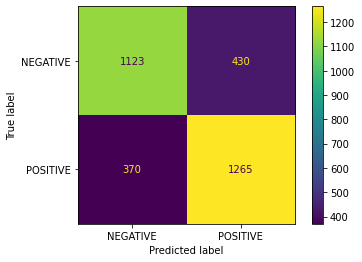

In [ ]:
print('#################################################')
print('#######           SVM       #####################')
print('#################################################')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
y_pred_train = sv.predict(X_train)

print('accuracy score _ on train   :', accuracy_score(y_pred_train, y_train))
print('\n')
print('accuracy score _ on test   :', accuracy_score(y_pred, y_test))
print('\n')
print('Classification on train   :', classification_report(y_train, y_pred_train, labels=[0, 1]))
print('\n')
print(classification_report(y_test, y_pred, labels=[0, 1]))
print('\n')
cm = confusion_matrix(y_test,y_pred)
#print('Accuracy of model :',model,'=',y)
print('confusion matrix   :')
   
cmd = ConfusionMatrixDisplay(cm, display_labels=['NEGATIVE','POSITIVE'])
cmd.plot()
print('########################################################')

### HyperparameterTuning :

In [ ]:
# example of grid searching key hyperparametres for SVC
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['rbf', 'sigmoid']
C = [50,10, 1.0, 0.1]
#kernel = ['rbf', 'sigmoid']
#C = [10,0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.737596 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.705739 (0.008829) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.684111 (0.006576) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.726447 (0.007418) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.701033 (0.004368) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.737596 (0.005359) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.732116 (0.006051) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.676080 (0.006265) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.715382 (0.006293) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}


#################################################
#######           SVM_Tuned #####################
#################################################
accuracy score _ on train   : 0.9390492626294321


accuracy score _ on test   : 0.7490589711417817


Classification on train   :               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6412
           1       0.93      0.95      0.94      6336

    accuracy                           0.94     12748
   macro avg       0.94      0.94      0.94     12748
weighted avg       0.94      0.94      0.94     12748



              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1553
           1       0.75      0.77      0.76      1635

    accuracy                           0.75      3188
   macro avg       0.75      0.75      0.75      3188
weighted avg       0.75      0.75      0.75      3188



confusion matrix   :
##########################################

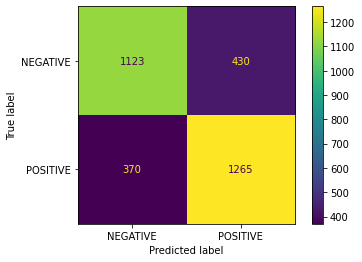

In [ ]:
print('#################################################')
print('#######           SVM_Tuned #####################')
print('#################################################')
sv_tuned = SVC(C=1, kernel = 'rbf', gamma='scale')
sv_tuned.fit(X_train, y_train)
y_pred = sv_tuned.predict(X_test)
y_pred_train = sv_tuned.predict(X_train)

print('accuracy score _ on train   :', accuracy_score(y_pred_train, y_train))
print('\n')
print('accuracy score _ on test   :', accuracy_score(y_pred, y_test))
print('\n')
print('Classification on train   :', classification_report(y_train, y_pred_train, labels=[0, 1]))
print('\n')
print(classification_report(y_test, y_pred, labels=[0, 1]))
print('\n')
cm = confusion_matrix(y_test,y_pred)
#print('Accuracy of model :',model,'=',y)
print('confusion matrix   :')
   
cmd = ConfusionMatrixDisplay(cm, display_labels=['NEGATIVE','POSITIVE'])
cmd.plot()
print('########################################################')

In [ ]:
# Create a pickle file using serialisation
import pickle
pickle_out = open("sv_classifier.pkl","wb")
pickle.dump(sv, pickle_out)
pickle_out.close()

## Predictions on New Data

In [ ]:
models = [lr , sv]

In [ ]:
new_reviews = ['i am happy','it is a pain in the butt', 'Very good effort, but not five stars', 'not Clear and not concise','i am good for now','never ever come back again']
new_reviews_class = [1,0,0,0,1,0]

print('Real classification of new inputs   :',new_reviews_class)
print('----------------------------------------------------------')
for model in models:
    X_new = vectorizer.transform(new_reviews)
    print('Predictions for model',model,'  :',model.predict(X_new))
    print('----------------------------------------------------------')

Real classification of new inputs   : [1, 0, 0, 0, 1, 0]
----------------------------------------------------------
Predictions for model LogisticRegression(max_iter=1000)   : [1 0 1 0 1 0]
----------------------------------------------------------
Predictions for model SVC()   : [1 0 0 0 1 0]
----------------------------------------------------------


https://realpython.com/python-keras-text-classification/

https://www.youtube.com/playlist?list=PLNvQn5fLVQdhWMqZWOdBFBZpKgPdTVGVF

# Sentiment Classification using  Neural Networks with Keras and Tensorflow :  

https://www.youtube.com/watch?v=2EiA_TA2NJo


psycho ⁉

https://www.youtube.com/channel/UCmsfL1mJHrqgmGkT5fghtzg/playlists





In [ ]:
import pandas as pd
from numpy.ma.core import asarray

from nltk.corpus import stopwords
from numpy import array
from numpy import asarray
from numpy import zeros
import seaborn as sns
import matplotlib.pyplot as plt


# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#keras & Tensorflow
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras import layers
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D, LSTM, GlobalMaxPooling1D

## Load dataset

In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/P_7/df_cleaned.csv')

In [ ]:
print(df_.shape)
df_.head(3)

(16000, 4)


,rank,tweet_,tw_stem,tw_lemm
0,0,@Superpaperlink @treesmurf11 Oh that's just an...,oh annoy guess use dsi specif stuff like app shop,oh annoying guess used dsi specific stuff like...
1,0,I miss you guys soo much,miss guy soo much,miss guy soo much
2,0,@emilyphillips i use to leave them in my trunk...,use leav trunk time,use leave trunk time


In [ ]:
df_.drop(['tweet_','tw_stem'],axis=1,inplace=True)

In [ ]:
# Check for null values
df_.isnull().any()

rank       False
tw_lemm     True
dtype: bool

In [ ]:
#################### Discard null tweet rows from dataset
df_ = df_.loc[df_['tw_lemm']!='']
####################
print('Count of null tweets   :',df_.loc[df_['tw_lemm']==''].shape[0])

Count of null tweets   : 0


In [ ]:
df_.head(2)

,rank,tw_lemm
0,0,oh annoying guess used dsi specific stuff like...
1,0,miss guy soo much


In [ ]:
X = df_['tw_lemm'].astype(str)
y = df_['rank']

##Split & Tokenize Data :

In [ ]:
# split dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [ ]:
# Preparing embedding layer :
# Embedding layer expects the words to be in numeric form
# Using Tokenizer fuction from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()

In [ ]:
# Build the word index from X_train set of data 
word_tokenizer.fit_on_texts(X_train)

In [ ]:
# Turn strings into lists of integer indices
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# Define it to get the max_length
X_text = word_tokenizer.texts_to_sequences(X)

In [ ]:
# Show the vocabulary 
word_index = word_tokenizer.word_index
print(word_tokenizer.word_index)
print('Found %s unique tokens. '% len(word_index))

{'day': 1, 'not': 2, 'get': 3, 'good': 4, 'go': 5, 'like': 6, 'quot': 7, 'work': 8, 'today': 9, 'time': 10, 'u': 11, 'going': 12, 'love': 13, 'lol': 14, 'got': 15, 'know': 16, 'back': 17, 'one': 18, 'im': 19, 'amp': 20, 'really': 21, 'want': 22, 'night': 23, 'see': 24, 'still': 25, 'well': 26, 'thanks': 27, 'think': 28, 'new': 29, 'home': 30, 'need': 31, 'last': 32, 'morning': 33, 'miss': 34, 'great': 35, 'tomorrow': 36, 'hope': 37, 'make': 38, 'oh': 39, 'twitter': 40, 'much': 41, 'haha': 42, 'feel': 43, 'wish': 44, 'come': 45, 'sleep': 46, 'week': 47, 'sad': 48, 'right': 49, 'tonight': 50, 'way': 51, 'friend': 52, 'sorry': 53, 'fun': 54, 'nice': 55, 'bad': 56, 'thing': 57, 'would': 58, 'watching': 59, 'happy': 60, 'look': 61, 'better': 62, 'gonna': 63, 'say': 64, 'could': 65, 'though': 66, 'hour': 67, 'school': 68, 'hate': 69, 'thank': 70, 'weekend': 71, 'next': 72, 'getting': 73, 'wait': 74, 'bed': 75, 'working': 76, 'yeah': 77, 'tired': 78, 'even': 79, 'guy': 80, 'awesome': 81, 'twe

In [ ]:
#adding 1 to store dimensions for words fo which no pretrained word embeddings exist
# gives simply count of unique words in our corpus

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

13955

In [ ]:
len(X_text)

16000

In [ ]:
#Identify max length of reviews
max_length = 0
for review_number in range(len(X_text)):
    numberofwords = len(X_text[review_number])
    if(numberofwords)>(max_length):
        max_length = numberofwords
print(max_length)

23


##Padding Data :

In [ ]:
#Padding all reviews to fixed length 100 

max_length = max_length

X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

## Embeddings :

### Glove Embeddings :

In [ ]:
# Load Glove word embeddings and create an Embeddings Dictionnary

GloVe: Global Vectors for Word Representation

https://nlp.stanford.edu/projects/glove/

In [ ]:
embeddings_dictionnary = dict()
glove_file = open('/content/drive/MyDrive/P_7/glove.6B.300d.txt',encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:],dtype='float32')
    embeddings_dictionnary[word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-Dimensionnal Glove word embeddings for all words in our corpus
embedding_dim = 300  # Dimension provided by Glove 300 uploaded
skipped_words_g =0

embedding_matrix_glove = zeros((vocab_length,embedding_dim))
print('Embedding Matrix shape :',embedding_matrix_glove.shape)

for word, index in word_tokenizer.word_index.items():
    try:
        embedding_vector_glove = embeddings_dictionnary.get(word)
    except: 
        skipped_words_g =skipped_words_g+1
        pass
    if embedding_vector_glove is not None :
        embedding_matrix_glove[index]=embedding_vector_glove

print('Count of skipped words  :',skipped_words_g)

Embedding Matrix shape : (13955, 300)
Count of skipped words  : 0


### Word2vec Embeddings :

In [ ]:
import gensim
from gensim import models

Text classification :              
https://www.tensorflow.org/text/tutorials/text_classification_rnn

https://www.tensorflow.org/tutorials/keras/text_classification

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py


In [ ]:
# Import pre-trained word2vec google file from drive
wordembeddings = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/P_7/GoogleNews-vectors-negative300.bin',binary=True)

In [ ]:
#import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')
# test how it works
#vec_king = wv['king']
# test if word do exist in database
#try:
#    vec_cameroon = wv['cameroon']
#except KeyError:
#    print("The word 'cameroon' does not appear in this model")

In [ ]:
# Create Embedding Matrix with word2vec uploaded google matrix

embedding_dim = 300  # Dimension provided by word2vec
skipped_words_w =0
word_skipped=[]

embedding_matrix_2vec = zeros((vocab_length,embedding_dim))
print('Embedding Matrix shape :',embedding_matrix_2vec.shape)

for word, index in word_tokenizer.word_index.items():
    
    try:
        embedding_vector_2vec = wordembeddings[word]
        word_skipped.append[word]
    except:
        skipped_words_w=skipped_words_w+1
        pass
    if embedding_vector_2vec is not None :
        embedding_matrix_2vec[index]=embedding_vector_2vec

print('Count of skipped words  :',skipped_words_w)

Embedding Matrix shape : (13955, 300)
Count of skipped words  : 13954


In [ ]:
word_skipped

[]

### Define Embedding layer : 

In [ ]:
# Create Embedding Layer for both methods 
from tensorflow.keras.layers import *
# Embedding layer for Glove 
embedding_layer_glo = Embedding(vocab_length, 300, weights=[embedding_matrix_glove], input_length=max_length, trainable=False)

# Embedding layer for word2vec
embedding_layer_wor2 = Embedding(vocab_length, 300, weights=[embedding_matrix_2vec], input_length=max_length, trainable=False)

## Define Models :

### Model with Embedding layer :

#### 1 - RNN with glove embedding layer :

In [ ]:
model_1_g = Sequential()
model_1_g.add(embedding_layer_glo)
model_1_g.add(SimpleRNN(128, activation='relu',return_sequences=True)) # return_sequences set true to allow transfer of results to next layer
model_1_g.add(SimpleRNN(256, activation='relu',return_sequences=True))
model_1_g.add(Flatten())
model_1_g.add(Dense(1, activation='sigmoid'))  # 1 neurone is sufficient for our task and identify sentence as positive or negative
print(model_1_g.summary())

# Compile model
from keras.optimizers import *
     
#opt = SGD(lr = 0.01, decay =1e -6)
model_1_g.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 300)           4186500   
                                                                 
 simple_rnn (SimpleRNN)      (None, 23, 128)           54912     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 23, 256)           98560     
                                                                 
 flatten (Flatten)           (None, 5888)              0         
                                                                 
 dense (Dense)               (None, 1)                 5889      
                                                                 
Total params: 4,345,861
Trainable params: 159,361
Non-trainable params: 4,186,500
_________________________________________________________________
None


In [ ]:
# Fit the network
model_1_g_history = model_1_g.fit(X_train,y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 15s 33ms/step - loss: 0.6052 - accuracy: 0.6610 - val_loss: 0.5429 - val_accuracy: 0.7223
Epoch 2/10
320/320 [==============================] - 12s 36ms/step - loss: 0.4948 - accuracy: 0.7622 - val_loss: 0.5568 - val_accuracy: 0.7066
Epoch 3/10
320/320 [==============================] - 10s 32ms/step - loss: 0.4184 - accuracy: 0.8061 - val_loss: 0.5786 - val_accuracy: 0.7082
Epoch 4/10
320/320 [==============================] - 10s 32ms/step - loss: 0.3270 - accuracy: 0.8577 - val_loss: 0.6587 - val_accuracy: 0.7020
Epoch 5/10
320/320 [==============================] - 10s 32ms/step - loss: 0.2323 - accuracy: 0.9033 - val_loss: 0.8653 - val_accuracy: 0.6965
Epoch 6/10
320/320 [==============================] - 10s 32ms/step - loss: 0.1579 - accuracy: 0.9365 - val_loss: 0.8684 - val_accuracy: 0.6777
Epoch 7/10
320/320 [==============================] - 10s 32ms/step - loss: 0.1139 - accuracy: 0.9567 - val_loss: 1.1664 - val_accuracy:

In [ ]:
####### Prediction on the test set
score = model_1_g.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 1s 6ms/step - loss: 1.3570 - accuracy: 0.6819


In [ ]:
y_pred = model_1_g.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred

array([[9.9953198e-01],
       [9.9999714e-01],
       [7.7001096e-05],
       ...,
       [5.4725051e-02],
       [1.8733177e-02],
       [5.9226710e-01]], dtype=float32)

In [ ]:
y_pred_fix = []
for i in list(y_pred):
    if i >= 0.5 :
        y=1
        y_pred_fix.append(y)
    else :
        y=0
        y_pred_fix.append(y)

In [ ]:
results = pd.DataFrame(y_test)

In [ ]:
results['y_pred_'] = y_pred_fix

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 8756 to 15245
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   rank     3200 non-null   int64
 1   y_pred_  3200 non-null   int64
dtypes: int64(2)
memory usage: 75.0 KB


              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1604
           1       0.68      0.68      0.68      1596

    accuracy                           0.68      3200
   macro avg       0.68      0.68      0.68      3200
weighted avg       0.68      0.68      0.68      3200

confusion matrix   :
########################################################


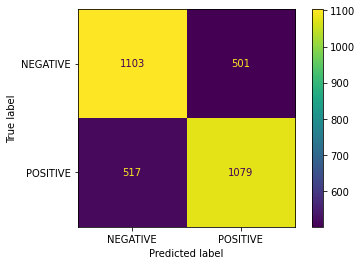

In [ ]:
print(classification_report(results['rank'],results['y_pred_'] , labels=[0, 1]))

cm = confusion_matrix(results['rank'],results['y_pred_'])
#print('Accuracy of model :',model,'=',y)
print('confusion matrix   :')
   
cmd = ConfusionMatrixDisplay(cm, display_labels=['NEGATIVE','POSITIVE'])
cmd.plot()
print('########################################################')

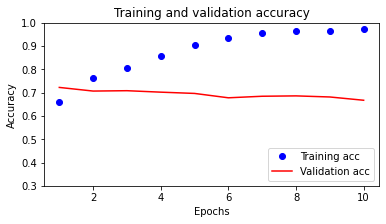

In [ ]:
####### Prediction on the test set
history_dict = model_1_g_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

In [ ]:
# Use of Dropout layers to reduce Overfitting observed in first model

In [ ]:
model_1_g_t = Sequential()
model_1_g_t.add(embedding_layer_glo)
model_1_g_t.add(SimpleRNN(128, activation='relu',return_sequences=True)) # return_sequences set true to allow transfer of results to next layer
model_1_g_t.add(Dropout(0.5))
model_1_g_t.add(SimpleRNN(256, activation='relu',return_sequences=True))
model_1_g_t.add(Dropout(0.5))
model_1_g_t.add(Dense(1, activation='sigmoid'))  # 1 neurone is sufficient for our task and identify sentence as positive or negative
print(model_1_g_t.summary())

# Compile model
from keras.optimizers import *
     
#opt = SGD(lr = 0.01, decay =1e -6)
model_1_g_t.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 300)           4186500   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 23, 128)           54912     
                                                                 
 dropout (Dropout)           (None, 23, 128)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 23, 256)           98560     
                                                                 
 dropout_1 (Dropout)         (None, 23, 256)           0         
                                                                 
 dense_1 (Dense)             (None, 23, 1)             257       
                                                                 
Total params: 4,340,229
Trainable params: 153,729
Non-

In [ ]:
# Fit the network
model_1_g_t_history = model_1_g_t.fit(X_train,y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 12s 33ms/step - loss: 0.6366 - accuracy: 0.6365 - val_loss: 0.5956 - val_accuracy: 0.6942
Epoch 2/10
320/320 [==============================] - 11s 35ms/step - loss: 0.5671 - accuracy: 0.7125 - val_loss: 0.5811 - val_accuracy: 0.7030
Epoch 3/10
320/320 [==============================] - 10s 32ms/step - loss: 0.5324 - accuracy: 0.7387 - val_loss: 0.5909 - val_accuracy: 0.7001
Epoch 4/10
320/320 [==============================] - 10s 32ms/step - loss: 0.5044 - accuracy: 0.7575 - val_loss: 0.6705 - val_accuracy: 0.7011
Epoch 5/10
320/320 [==============================] - 10s 32ms/step - loss: 0.4744 - accuracy: 0.7759 - val_loss: 0.5828 - val_accuracy: 0.6965
Epoch 6/10
320/320 [==============================] - 10s 31ms/step - loss: 0.4379 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7052
Epoch 7/10
320/320 [==============================] - 10s 32ms/step - loss: 0.3996 - accuracy: 0.8162 - val_loss: 0.6625 - val_accuracy:

In [ ]:
####### Prediction on the test set
score = model_1_g_t.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 1s 6ms/step - loss: 0.6180 - accuracy: 0.7016


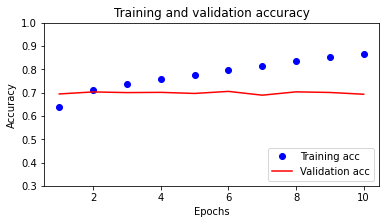

In [ ]:
####### Prediction on the test set
history_dict = model_1_g_t_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

In [ ]:
# Save the model :
model_1_g_t.save('/content/drive/MyDrive/P_7/My_RNN_model_8000.h5')

#### 2 - RNN with word2vec embedding layer :

In [ ]:
model_1_w = Sequential()
model_1_w.add(embedding_layer_wor2)
model_1_w.add(SimpleRNN(128, activation='relu',return_sequences=True)) # return_sequences set true to allow transfer of results to next layer
model_1_w.add(SimpleRNN(256, activation='relu',return_sequences=True))
model_1_w.add(Flatten())
model_1_w.add(Dense(1, activation='sigmoid'))  # 1 neurone is sufficient for our task and identify sentence as positive or negative
print(model_1_w.summary())

# Compile model
from keras.optimizers import *
     
#opt = SGD(lr = 0.01, decay =1e -6)
model_1_w.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 300)           4186500   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 23, 128)           54912     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 23, 256)           98560     
                                                                 
 flatten_1 (Flatten)         (None, 5888)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5889      
                                                                 
Total params: 4,345,861
Trainable params: 159,361
Non-trainable params: 4,186,500
_________________________________________________________________
None


In [ ]:
# Fit the network
model_1_w_history = model_1_w.fit(X_train,y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 11s 32ms/step - loss: 0.5894 - accuracy: 0.6778 - val_loss: 0.5397 - val_accuracy: 0.7305
Epoch 2/10
320/320 [==============================] - 10s 31ms/step - loss: 0.4974 - accuracy: 0.7608 - val_loss: 0.5372 - val_accuracy: 0.7266
Epoch 3/10
320/320 [==============================] - 10s 31ms/step - loss: 0.4368 - accuracy: 0.7969 - val_loss: 0.5378 - val_accuracy: 0.7262
Epoch 4/10
320/320 [==============================] - 10s 30ms/step - loss: 0.3550 - accuracy: 0.8425 - val_loss: 0.6025 - val_accuracy: 0.7289
Epoch 5/10
320/320 [==============================] - 10s 31ms/step - loss: 0.2604 - accuracy: 0.8926 - val_loss: 0.6961 - val_accuracy: 0.7141
Epoch 6/10
320/320 [==============================] - 10s 31ms/step - loss: 0.1884 - accuracy: 0.9213 - val_loss: 0.8600 - val_accuracy: 0.7066
Epoch 7/10
320/320 [==============================] - 11s 35ms/step - loss: 0.1377 - accuracy: 0.9459 - val_loss: 0.9450 - val_accuracy:

In [ ]:
####### Prediction on the test set
score = model_1_w.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 1s 6ms/step - loss: 1.3822 - accuracy: 0.7144


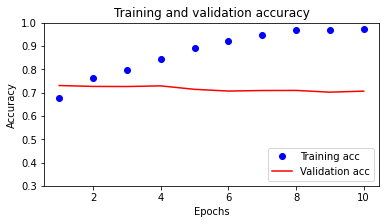

In [ ]:
####### Prediction on the test set
history_dict = model_1_w_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

#### 3 - CNN with glove embedding layer :

In [ ]:
model_2_g = Sequential()
model_2_g.add(embedding_layer_glo)
model_2_g.add(Conv1D(128,5,activation='relu'))
model_2_g.add(GlobalMaxPooling1D())
model_2_g.add(Dense(1,activation='sigmoid'))
####### Compile the model
model_2_g.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model_2_g.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 300)           4186500   
                                                                 
 conv1d (Conv1D)             (None, 19, 128)           192128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,378,757
Trainable params: 192,257
Non-trainable params: 4,186,500
_________________________________________________________________
None


In [ ]:
model_2_g_history = model_2_g.fit(X_train, y_train,epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 11s 4ms/step - loss: 0.5785 - accuracy: 0.6979 - val_loss: 0.5607 - val_accuracy: 0.7078
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8130 - val_loss: 0.5633 - val_accuracy: 0.7102
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.8995 - val_loss: 0.5858 - val_accuracy: 0.7141
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.1739 - accuracy: 0.9486 - val_loss: 0.6391 - val_accuracy: 0.7121
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9714 - val_loss: 0.6853 - val_accuracy: 0.7125
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9812 - val_loss: 0.7319 - val_accuracy: 0.7102
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9888 - val_loss: 0.7951 - val_accuracy: 0.6953
Epoch

In [ ]:
####### Prediction on the test set
score = model_2_g.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.7163


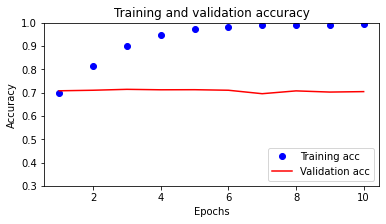

In [ ]:
####### Prediction on the test set
history_dict = model_2_g_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

#### 4 - CNN with word2vec embedding layer :

In [ ]:
model_2_w = Sequential()
model_2_w.add(embedding_layer_wor2)
model_2_w.add(Conv1D(128,5,activation='relu'))
model_2_w.add(GlobalMaxPooling1D())
model_2_w.add(Dense(1,activation='sigmoid'))
####### Compile the model
model_2_w.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model_2_w.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 300)           4186500   
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 128)           192128    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,378,757
Trainable params: 192,257
Non-trainable params: 4,186,500
_________________________________________________________________
None


In [ ]:
model_2_w_history = model_2_w.fit(X_train, y_train,epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 2s 4ms/step - loss: 0.5685 - accuracy: 0.7013 - val_loss: 0.5387 - val_accuracy: 0.7258
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.7946 - val_loss: 0.5400 - val_accuracy: 0.7336
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8605 - val_loss: 0.5745 - val_accuracy: 0.7277
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2452 - accuracy: 0.9198 - val_loss: 0.6033 - val_accuracy: 0.7160
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9559 - val_loss: 0.6121 - val_accuracy: 0.7270
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.1094 - accuracy: 0.9731 - val_loss: 0.6667 - val_accuracy: 0.7211
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.0764 - accuracy: 0.9834 - val_loss: 0.6966 - val_accuracy: 0.7242
Epoch 

In [ ]:
####### Prediction on the test set
score = model_2_w.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.7253


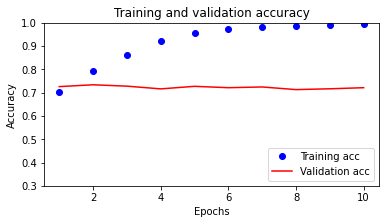

In [ ]:
####### Prediction on the test set
history_dict = model_2_w_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

In [ ]:
# Save the model :
model_2_w.save('/content/drive/MyDrive/P_7/My_CNN_model_8000.h5')

### Model with Embedding layer & LSTM  :

https://analyticsindiamag.com/a-complete-guide-to-lstm-architecture-and-its-use-in-text-classification/

https://medium.com/coinmonks/text-classifier-with-keras-tensorflow-using-recurrent-neural-networks-ad63dd5fc316

https://www.kaggle.com/code/roblexnana/sentiment-analysis-with-keras-and-lstm

#### 1 - LSTM with glove Embedding :

In [ ]:
######Define the model 
lstm_model_g = Sequential()
lstm_model_g.add(embedding_layer_glo)
lstm_model_g.add(LSTM(128))
lstm_model_g.add(Dense(1, activation ='sigmoid'))

####### Compile the model
lstm_model_g.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(lstm_model_g.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 300)           4186500   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,406,277
Trainable params: 219,777
Non-trainable params: 4,186,500
_________________________________________________________________
None


In [ ]:
lstm_model_g_history = lstm_model_g.fit(X_train, y_train,epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 4s 6ms/step - loss: 0.5890 - accuracy: 0.6879 - val_loss: 0.5606 - val_accuracy: 0.7027
Epoch 2/10
320/320 [==============================] - 2s 5ms/step - loss: 0.5312 - accuracy: 0.7382 - val_loss: 0.5548 - val_accuracy: 0.7148
Epoch 3/10
320/320 [==============================] - 2s 5ms/step - loss: 0.5037 - accuracy: 0.7558 - val_loss: 0.5597 - val_accuracy: 0.7164
Epoch 4/10
320/320 [==============================] - 2s 5ms/step - loss: 0.4713 - accuracy: 0.7738 - val_loss: 0.5734 - val_accuracy: 0.7141
Epoch 5/10
320/320 [==============================] - 2s 5ms/step - loss: 0.4310 - accuracy: 0.8016 - val_loss: 0.5852 - val_accuracy: 0.7168
Epoch 6/10
320/320 [==============================] - 2s 5ms/step - loss: 0.3941 - accuracy: 0.8218 - val_loss: 0.5981 - val_accuracy: 0.7203
Epoch 7/10
320/320 [==============================] - 2s 5ms/step - loss: 0.3311 - accuracy: 0.8583 - val_loss: 0.6491 - val_accuracy: 0.7117
Epoch 

In [ ]:
####### Prediction on the test set

score = lstm_model_g.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 0s 3ms/step - loss: 0.8139 - accuracy: 0.7166


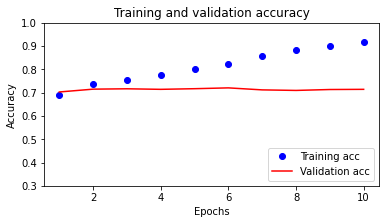

In [ ]:
####### Prediction on the test set
history_dict = lstm_model_g_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

#### 2 - LSTM with word2vec Embedding :

In [ ]:
######Define the model 
lstm_model_w = Sequential()
lstm_model_w.add(embedding_layer_wor2)
lstm_model_w.add(LSTM(128))
lstm_model_w.add(Dense(1, activation ='sigmoid'))

####### Compile the model
lstm_model_w.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(lstm_model_w.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 300)           4186500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,406,277
Trainable params: 219,777
Non-trainable params: 4,186,500
_________________________________________________________________
None


In [ ]:
lstm_model_w_history = lstm_model_w.fit(X_train, y_train,epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 3s 7ms/step - loss: 0.5784 - accuracy: 0.6922 - val_loss: 0.5570 - val_accuracy: 0.7172
Epoch 2/10
320/320 [==============================] - 2s 5ms/step - loss: 0.5376 - accuracy: 0.7346 - val_loss: 0.5649 - val_accuracy: 0.7199
Epoch 3/10
320/320 [==============================] - 2s 5ms/step - loss: 0.5156 - accuracy: 0.7477 - val_loss: 0.5509 - val_accuracy: 0.7281
Epoch 4/10
320/320 [==============================] - 2s 7ms/step - loss: 0.5014 - accuracy: 0.7609 - val_loss: 0.5455 - val_accuracy: 0.7285
Epoch 5/10
320/320 [==============================] - 2s 7ms/step - loss: 0.4874 - accuracy: 0.7707 - val_loss: 0.5329 - val_accuracy: 0.7332
Epoch 6/10
320/320 [==============================] - 2s 5ms/step - loss: 0.4638 - accuracy: 0.7813 - val_loss: 0.5783 - val_accuracy: 0.7348
Epoch 7/10
320/320 [==============================] - 2s 5ms/step - loss: 0.4420 - accuracy: 0.7991 - val_loss: 0.5410 - val_accuracy: 0.7387
Epoch 

In [ ]:
####### Prediction on the test set

score = lstm_model_w.evaluate(X_test, y_test, verbose =1)

100/100 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.7262


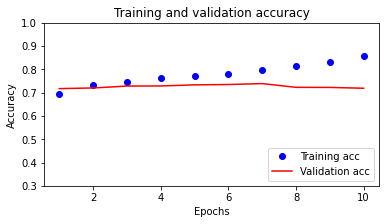

In [ ]:
####### Prediction on the test set
history_dict = lstm_model_w_history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

In [ ]:
# Save the model :
lstm_model_w.save('/content/drive/MyDrive/P_7/My_lstm_model_8000.h5')

## Bert FineTuning  :



In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter

import re
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

In [ ]:
n = 8000
df = pd.read_csv('/content/drive/MyDrive/P_7/df_original.csv')
############################################
df1 = df.loc[df['rank']==0].sample(n=n)
df2 = df.loc[df['rank']==1].sample(n=n)
###########################################

trames = [df1,df2]
df = pd.concat(trames)

df.rename(columns = {'tweet_':'Phrase', 'rank':'Sentiment'}, inplace = True)
print('')
print(df.isnull().sum())

In [ ]:
df['Phrase'].str.split().map(lambda x: len(x)).max()

33

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 32.7 MB/s 
     |████████████████████████████████| 120 kB 68.9 MB/s 
     |████████████████████████████████| 6.6 MB 58.4 MB/s 


In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = df[['Phrase', 'Sentiment']]

# Set your model output as categorical and save in new label col
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])

# Transform your output to numeric
data['Sentiment'] = data['Sentiment_label'].cat.codes

In [ ]:
data_train, data_val = train_test_split(data, test_size = 0.2)
data_val, data_test = train_test_split(data_val, test_size = 0.5)

In [ ]:
from transformers import TFBertModel,  BertConfig, BertTokenizerFast

In [ ]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 45

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_bert_model = TFBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
### ------- Build the model ------- ###

# Load the MainLayer
bert = transformer_bert_model.layers[0]

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}

# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Then build your model output
Sentiments = Dense(units=len(data_train.Sentiment_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='Sentiment')(pooled_output)
outputs = {'Sentiment': Sentiments}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiClass')

# Take a look at the model
model.summary()

Model: "BERT_MultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 45)]              0         
                                                                 
 bert (TFBertMainLayer)      TFBaseModelOutputWithPoo  109482240 
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             45, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                   

In [ ]:
### ------- Train the model ------- ###

# Set an optimizer
optimizer = Adam(learning_rate=5e-05,epsilon=1e-08,decay=0.01,clipnorm=1.0)

# Set loss and metrics
loss = {'Sentiment': CategoricalCrossentropy(from_logits = True)}

# Compile the model
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

# Ready output data for the model
y_train = to_categorical(data_train['Sentiment'])

# Tokenize the input (takes some time)
x_train = tokenizer(
          text=data_train['Phrase'].to_list(),
          add_special_tokens=True,
          max_length=max_length,
          truncation=True,
          padding=True, 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          verbose = True)

y_val = to_categorical(data_val['Sentiment'])

x_val = tokenizer(
          text=data_val['Phrase'].to_list(),
          add_special_tokens=True,
          max_length=max_length,
          truncation=True,
          padding=True, 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          verbose = True)

y_test = to_categorical(data_test['Sentiment'])

x_test = tokenizer(
          text=data_test['Phrase'].to_list(),
          add_special_tokens=True,
          max_length=max_length,
          truncation=True,
          padding=True, 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x_train['input_ids']},
    y={'Sentiment': y_train},
    validation_data=({'input_ids': x_val['input_ids']},{'Sentiment': y_val}),
    batch_size=32,
    epochs=5,
    verbose=1)

Epoch 1/5
400/400 [==============================] - 139s 307ms/step - loss: 0.4674 - accuracy: 0.7752 - val_loss: 0.3751 - val_accuracy: 0.8363
Epoch 2/5
400/400 [==============================] - 128s 321ms/step - loss: 0.3056 - accuracy: 0.8733 - val_loss: 0.3922 - val_accuracy: 0.8344
Epoch 3/5
400/400 [==============================] - 132s 330ms/step - loss: 0.2304 - accuracy: 0.9080 - val_loss: 0.4084 - val_accuracy: 0.8306
Epoch 4/5
400/400 [==============================] - 134s 336ms/step - loss: 0.1777 - accuracy: 0.9331 - val_loss: 0.4912 - val_accuracy: 0.8288
Epoch 5/5
400/400 [==============================] - 135s 337ms/step - loss: 0.1408 - accuracy: 0.9495 - val_loss: 0.5172 - val_accuracy: 0.8256


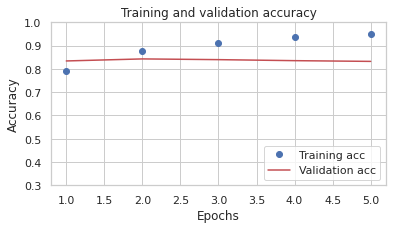

In [ ]:
####### Prediction on the test set
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(6,3))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.3,1))
plt.show()

In [ ]:
model.evaluate(x={'input_ids': x_test['input_ids']},
    y={'Sentiment': y_test})

50/50 [==============================] - 5s 90ms/step - loss: 0.5810 - accuracy: 0.8069


[0.5810160636901855, 0.8068749904632568]

In [ ]:
# Save the model :
model.save('/content/drive/MyDrive/P_7/My_bert_model_8000.h5')

# References :

https://www.kaggle.com/code/michawilkosz/twitter-sentiment-analysis-using-tensorflow/notebook

https://www.kaggle.com/code/ngyptr/lstm-sentiment-analysis-keras

https://youtu.be/RgpANRh44ao

https://www.youtube.com/watch?v=31yjNnFC1xQ&list=PLq3JD94au33Ko62Ti4lXedSnVekVfLzrC&index=12

https://www.kaggle.com/code/xhlulu/disaster-nlp-distilbert-in-tf/notebook

https://colab.research.google.com/drive/1aBsmrY-tV4fqk6xCw9PRIWc5NK5t36r6